## Dataset Penjualan Amazon

# Tentang Dataset
Dataset ini memiliki data Peringkat dan Ulasan Produk Amazon 1K+ sesuai rincian yang tercantum di situs web resmi Amazon

Fitur:
- product_id - ID Produk
- product_name - Nama Produk
- kategori - Kategori Produk
- discounted_price - Harga Produk yang Didiskon
- actual_price - Harga Aktual Produk
- discount_percentage - Persentase Diskon untuk Produk
- rating - Rating Produk
- rating_count - Jumlah orang yang memilih peringkat Amazon
- about_product - Deskripsi tentang Produk
- user_id - ID pengguna yang menulis ulasan untuk Produk
- user_name - Nama pengguna yang menulis ulasan untuk Produk
- review_id - ID ulasan pengguna
- review_title - Ulasan singkat
- review_content - Ulasan panjang
- img_link - Tautan Gambar Produk
- product_link - Tautan Situs Web Resmi Produk

Amazon adalah Perusahaan Multinasional Teknologi Amerika yang bisnisnya meliputi E-commerce, tempat mereka membeli dan menyimpan inventaris, dan mengurus semuanya mulai dari pengiriman dan penetapan harga hingga layanan pelanggan dan pengembalian. Saya membuat kumpulan data ini agar orang-orang dapat bermain-main dengan kumpulan data ini dan melakukan banyak hal seperti yang disebutkan di bawah ini

- Panduan Kumpulan Data
- Memahami Hirarki Kumpulan Data
- Praproses Data
- Analisis Data Eksplorasi
- Visualisasi Data
- Membuat Sistem Rekomendasi
Ini adalah daftar beberapa hal yang dapat Anda lakukan pada kumpulan data ini. Tidak terbatas pada hal yang disebutkan di sana, tetapi masih banyak hal lain yang dapat dilakukan.

## Import Library

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as hie
from sklearn.preprocessing import StandardScaler
!pip install kneed

## Load Data

In [91]:
url = "https://raw.githubusercontent.com/Rosdiana13/ALP-DM-Ros_Diana/refs/heads/main/amazon.csv"
df = pd.read_csv(url)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Data Preparation & Data Celaning

- Data cleaning, also known as data preprocessing or data scrubbing, is the process of identifying, correcting and transforming raw data into consistent, accurate and reliable formats for analysis, visualization or machine learning

- Data Preparation is the process of preparing data for analysis or modeling.

In [92]:
df.shape

(1465, 16)

In [93]:
df.info()

# Number of rows: 1465
# Number of columns: 16
# Index: RangeIndex (0-1464)
# Data types: All columns are objects (strings)
# Memory usage: 183.3 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [94]:
# Cek Missing Value

df.isnull().sum() 

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [95]:
# Menghaspu kolum yang tidak berkaitan
df2 = df.drop(columns=['product_id','user_id','review_id','img_link','product_link'])


Convert columns ke int/float yang hanya yang ada angkanya. 

In [96]:
# Convert price columns to numeric
df2['discounted_price'] = pd.to_numeric(df2['discounted_price'].str.replace('₹', '').str.replace(',', ''))
df2['actual_price'] = pd.to_numeric(df2['actual_price'].str.replace('₹', '').str.replace(',', ''))

In [97]:
# Convert rating to numeric
df2['rating'] = df2['rating'].str.replace('|', '').str.replace(',', '')
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

df2.dropna(subset=['rating'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3428\453352158.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['rating'] = df2['rating'].str.replace('|', '').str.replace(',', '')


In [98]:
# Convert rating to numeric
df2['rating_count'] = pd.to_numeric(df2['rating_count'].str.replace(',', ''))

df2['discount_percentage'] = df2['discount_percentage'].str.replace('%', '').astype(float)/100

In [99]:
df2['discount_percentage'] = df2['discount_percentage'].apply(lambda x: int(x * 100 % 100))

In [100]:
# Mengatasi missing value pada rating count dengan mengisinya dengan rata-rata
df2['rating_count'] = df2['rating_count'].fillna(df2['rating_count'].mean())

In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1464 non-null   object 
 1   category             1464 non-null   object 
 2   discounted_price     1464 non-null   float64
 3   actual_price         1464 non-null   float64
 4   discount_percentage  1464 non-null   int64  
 5   rating               1464 non-null   float64
 6   rating_count         1464 non-null   float64
 7   about_product        1464 non-null   object 
 8   user_name            1464 non-null   object 
 9   review_title         1464 non-null   object 
 10  review_content       1464 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 137.2+ KB


In [102]:
df2.isnull().sum() 

product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_name              0
review_title           0
review_content         0
dtype: int64

In [103]:
df2.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,3126.011906,5447.002923,47.671448,4.096585,18307.376881
std,6946.625442,10878.270001,21.623874,0.291674,42736.854793
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,323.750000,800.000000,32.000000,4.000000,1192.500000
50%,799.000000,1650.000000,50.000000,4.100000,5187.000000
75%,1999.000000,4303.750000,63.000000,4.300000,17398.750000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [104]:
df2.columns

Index(['product_name', 'category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'user_name', 'review_title', 'review_content'],
      dtype='object')

In [105]:
# menghapus baris yang duplicat
df2.drop_duplicates(inplace=True)

In [106]:
df2.duplicated().any()

False

## Exploratory Data Analysis (EDA)

EDA is an iterative process of visually and statistically exploring data to understand its underlying patterns, relationships, and structure.


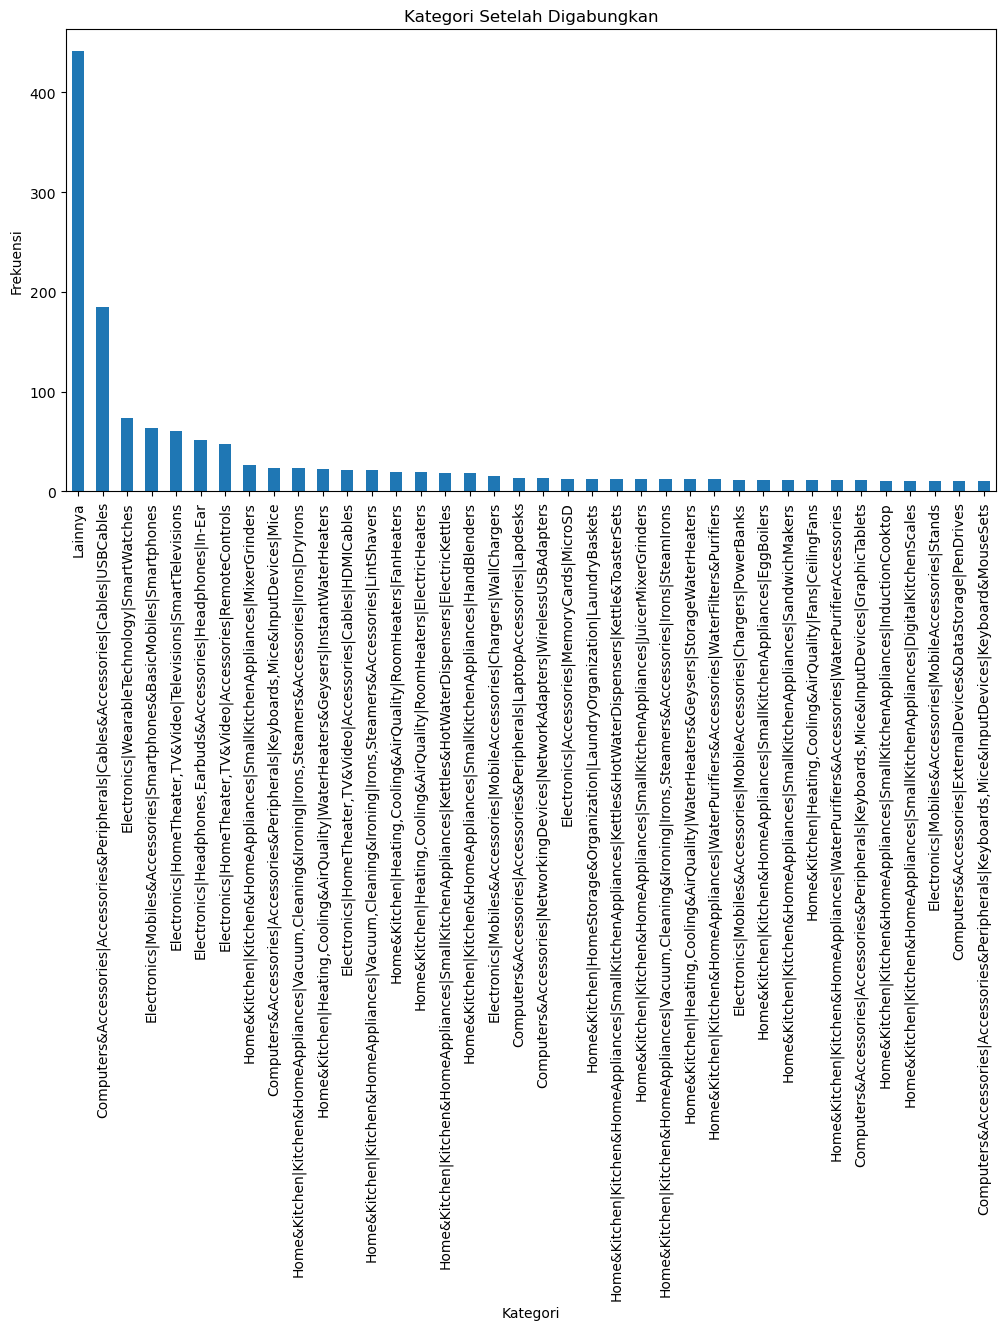

In [107]:
# Hitung frekuensi kategori
category_counts = df2['category'].value_counts()

# Tetapkan threshold
threshold = 10

# Gabungkan kategori dengan jumlah < threshold
df2['category'] = df2['category'].apply(lambda x: x if category_counts[x] >= threshold else 'Lainnya')

# Hitung ulang frekuensi kategori yang digabungkan
grouped_counts = df2['category'].value_counts()

# Visualisasi
grouped_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Kategori Setelah Digabungkan")
plt.xlabel("Kategori")
plt.ylabel("Frekuensi")
plt.show()

**Tujuan**: Menyederhanakan kategori dengan jumlah kecil agar analisis lebih fokus pada kategori dominan.
1. **Menghitung Frekuensi Kategori**  
   Menggunakan `value_counts()` untuk menghitung jumlah setiap kategori.

2. **Menetapkan Threshold**  
   Kategori dengan frekuensi kurang dari 10 digabungkan menjadi "Lainnya".

3. **Menggabungkan Kategori**  
   Menggunakan `apply()` untuk mengganti kategori yang frekuensinya rendah dengan "Lainnya".

4. **Menghitung Frekuensi Kategori Baru**  
   Frekuensi kategori dihitung ulang setelah penggabungan.

5. **Visualisasi**  
   Membuat grafik batang untuk menampilkan frekuensi kategori setelah penggabungan.

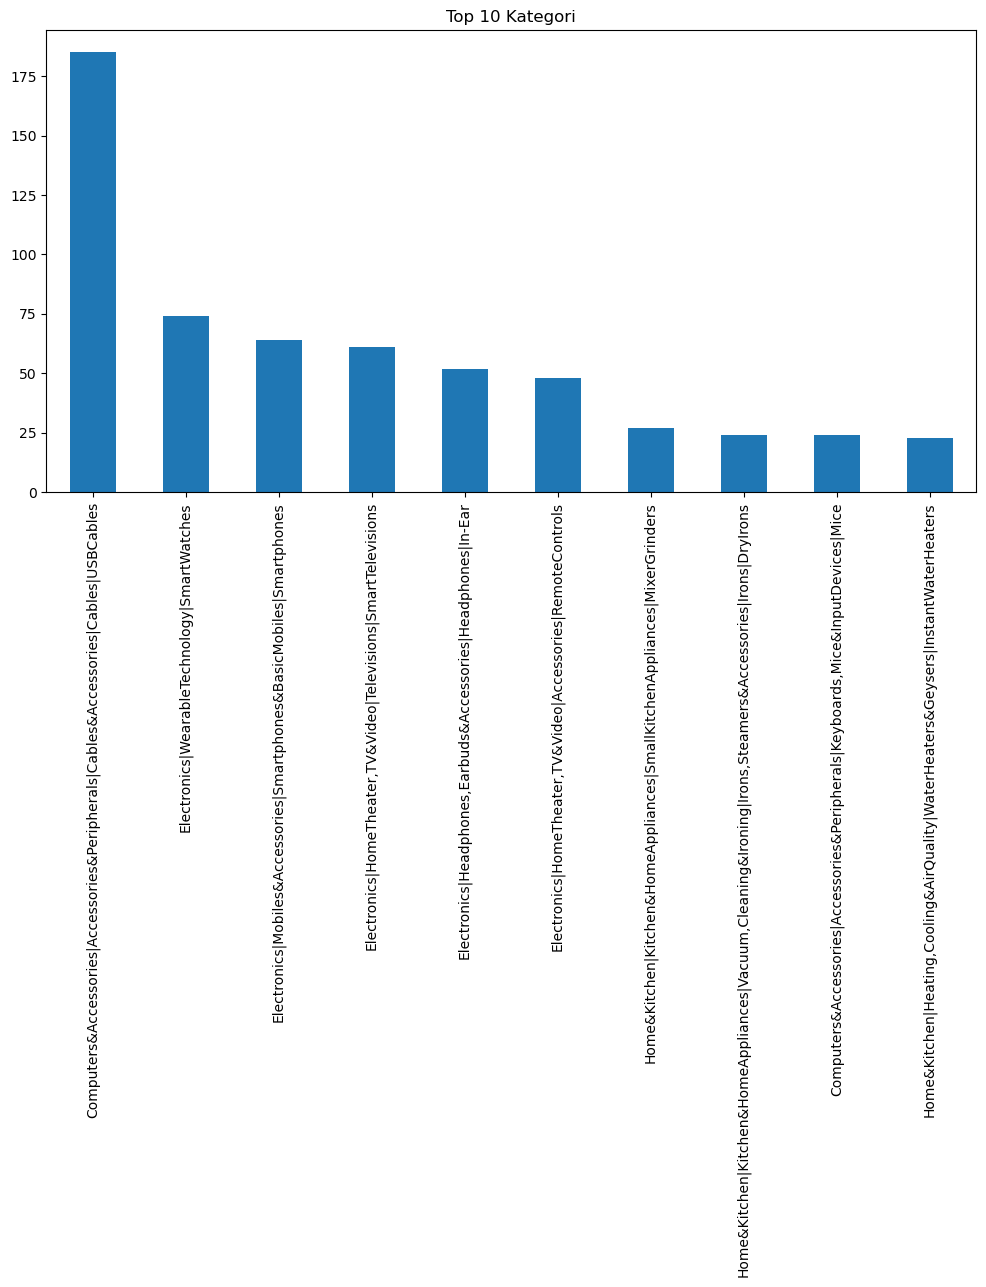

In [108]:
top_categories = category_counts.head(10)

# Filter data hanya untuk kategori ini
filtered_data = df2[df2['category'].isin(top_categories.index)]

# Visualisasi
top_categories.plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Kategori")
plt.show()

## Bar Chart: Top 10 Kategori

### Grafik dan Observasi
Bar Chart ini menampilkan **10 kategori teratas** berdasarkan metrik tertentu (kemungkinan frekuensi atau jumlah). Kategori yang ditampilkan mencakup berbagai produk yang dapat dikelompokkan ke dalam tiga kategori utama:

1. **Elektronik dan Gadget**:  
   - Contoh: Smartwatch, Smartphone, Televisi, Earbuds.
2. **Peralatan Rumah Tangga**:  
   - Contoh: Peralatan Dapur, Pemanas Air, dan produk sejenis.
3. **Aksesori Komputer**:  
   - Contoh: Kabel, Keyboard, Mouse, dan periferal terkait.

### Kesimpulan
- **Dominasi Elektronik dan Gadget**:  
  Kategori Elektronik dan Gadget berada di urutan teratas, menunjukkan minat atau permintaan yang lebih tinggi terhadap produk elektronik konsumen.
- **Aksesori Komputer di Posisi Kedua**:  
  Aksesori Komputer juga menunjukkan permintaan yang signifikan, menduduki peringkat kedua.
- **Peralatan Rumah Tangga Lebih Rendah**:  
  Peralatan Rumah Tangga berada di posisi lebih rendah dibandingkan dua kategori lainnya, yang mengindikasikan bahwa minat atau kebutuhan terhadap produk ini relatif lebih kecil.

Bar Chart ini menunjukkan bahwa fokus utama konsumen lebih condong pada produk elektronik dan aksesori terkait dibandingkan dengan kebutuhan rumah tangga.


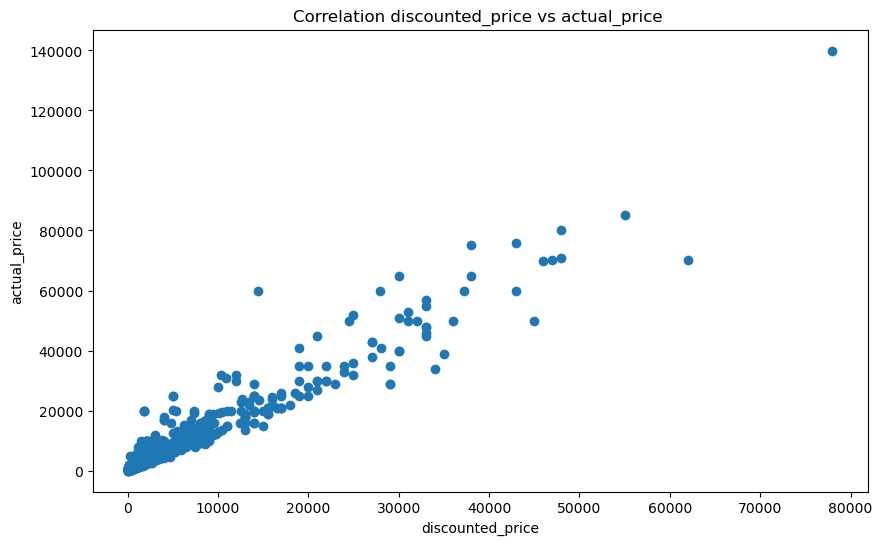

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(df2['discounted_price'], df2['actual_price'])
plt.title('Correlation discounted_price vs actual_price ')
plt.xlabel('discounted_price')
plt.ylabel('actual_price')
plt.show()

## Korelasi Harga Diskon vs Harga Aktual

### Grafik dan Observasi
Grafik ini menunjukkan hubungan antara **harga diskon** dan **harga aktual**. Berikut adalah observasi utamanya:
- **Korelasi Positif**:  
  Titik-titik data membentuk pola yang menunjukkan adanya korelasi positif. Ketika **harga diskon** meningkat, **harga aktual** juga cenderung meningkat.
- **Hubungan Linier**:  
  Titik-titik data cukup terkelompok sepanjang **tren diagonal**, yang mengindikasikan adanya hubungan linier antara kedua variabel.
- **Outlier**:  
  Beberapa penyimpangan terlihat, terutama pada **rentang harga yang lebih tinggi**, tetapi secara keseluruhan hubungan tetap kuat.

### Kesimpulan
- **Korelasi yang Kuat**:  
  Terdapat korelasi positif yang kuat antara **harga diskon** dan **harga aktual**, yang menunjukkan bahwa produk dengan harga aktual lebih tinggi cenderung memiliki harga diskon yang lebih tinggi pula.
- **Prediksi Variabel**:  
  Hubungan ini dapat dimanfaatkan untuk **memprediksi harga diskon** berdasarkan harga aktual, atau sebaliknya, menggunakan model regresi linier atau metode analisis lainnya.


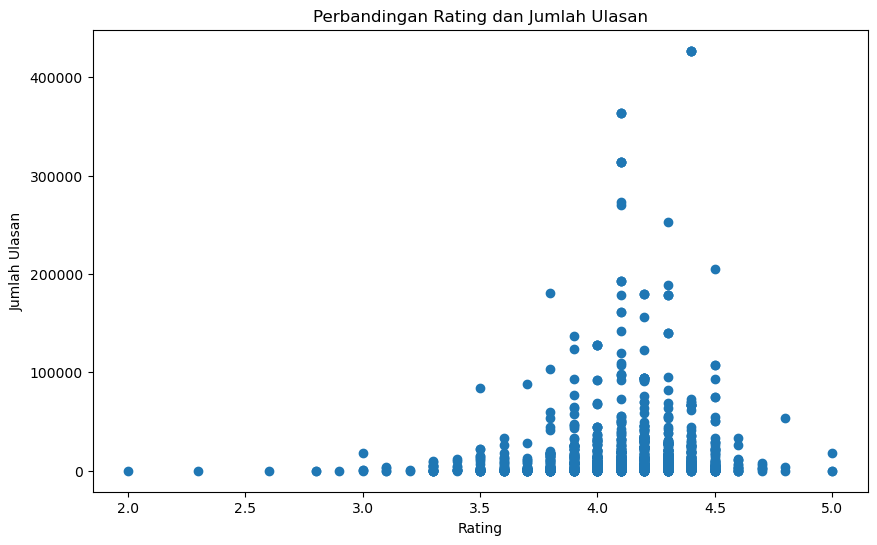

In [110]:
plt.figure(figsize=(10,6))
plt.scatter(df2['rating'], df2['rating_count'])
plt.title('Perbandingan Rating dan Jumlah Ulasan')
plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')
plt.show()

## Perbandingan Rating dan Jumlah Ulasan

### Grafik dan Observasi
Grafik ini menggambarkan hubungan antara **rating (sumbu X)** dan **jumlah ulasan (sumbu Y)**. Berikut adalah observasi utamanya:
- **Konsentrasi Data**:  
  Sebagian besar data terkonsentrasi di antara rating **3.5 hingga 4.5**, menunjukkan bahwa sebagian besar produk mendapatkan rating yang cukup tinggi.
- **Jumlah Ulasan Tertinggi**:  
  Jumlah ulasan memuncak di sekitar rating **4.0 hingga 4.5**, mengindikasikan bahwa produk dengan rating lebih tinggi menarik lebih banyak ulasan.
- **Rating Rendah**:  
  Produk dengan rating di bawah **3.0** umumnya memiliki lebih sedikit ulasan, yang mungkin menunjukkan **popularitas** atau **kepuasan pelanggan** yang lebih rendah.
- **Outlier**:  
  Terdapat beberapa outlier dengan jumlah ulasan yang sangat tinggi, terutama pada rating sekitar **4.0**.

### Kesimpulan
- **Popularitas dan Kepuasan**:  
  Produk dengan rating lebih tinggi (**4.0–4.5**) cenderung memiliki lebih banyak ulasan, menunjukkan **korelasi positif** antara popularitas produk dan tingkat kepuasan pelanggan.
- **Produk Rating Rendah**:  
  Produk dengan rating lebih rendah cenderung kurang diminati atau memiliki keterlibatan yang lebih rendah dari pelanggan.


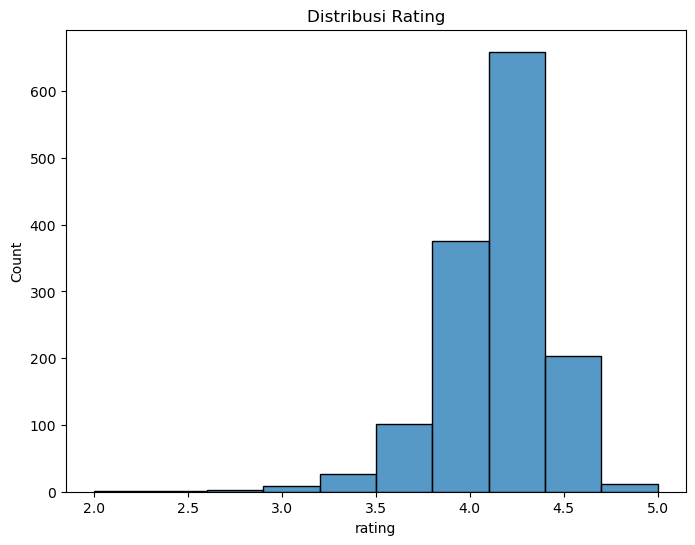

In [111]:

# Distribusi Rating
plt.figure(figsize=(8,6))
sns.histplot(df2['rating'], bins=10)
plt.title('Distribusi Rating')
plt.show()


## Distribusi Rating

### Sebaran Rating
- **Sebaran Rating**: Distribusi rating cenderung miring ke kanan, artinya lebih banyak produk mendapat rating rendah dibandingkan rating tinggi.
- **Rating Terbanyak**: Sebagian besar produk memiliki rating antara **4.0 hingga 4.5**.
- **Rentang Rating**: Rating produk berkisar antara **2.0 hingga 5.0**.

### Artinya
- **Kepuasan Pelanggan**:  
  Sebaran yang miring ke kanan menunjukkan bahwa sebagian besar pelanggan cenderung memberikan rating rendah dibandingkan rating tinggi. Ini bisa mengindikasikan adanya area yang perlu ditingkatkan dalam kualitas produk atau layanan.
- **Performa Produk**:  
  Rata-rata rating berada di kisaran **4.0-4.5**, menunjukkan bahwa sebagian besar produk memiliki performa yang cukup baik, namun masih ada ruang untuk peningkatan agar mencapai tingkat kepuasan yang lebih tinggi.

### Catatan
- **Analisis Kompetitor**:  
  Membandingkan distribusi ini dengan standar industri atau rating kompetitor akan membantu memahami performa relatif produk.
- **Analisis Faktor Lain**:  
  Menganalisis rating bersama faktor lain seperti kategori produk, harga, atau merek dapat memberikan wawasan yang lebih mendalam tentang faktor-faktor yang mempengaruhi kepuasan pelanggan.


## Feature Engineering

Feature Engineering is the process of creating new features from existing data to improve the quality of machine learning models

In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1392 non-null   object 
 1   category             1392 non-null   object 
 2   discounted_price     1392 non-null   float64
 3   actual_price         1392 non-null   float64
 4   discount_percentage  1392 non-null   int64  
 5   rating               1392 non-null   float64
 6   rating_count         1392 non-null   float64
 7   about_product        1392 non-null   object 
 8   user_name            1392 non-null   object 
 9   review_title         1392 non-null   object 
 10  review_content       1392 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 130.5+ KB


In [113]:
le_product_name = LabelEncoder()
le_category = LabelEncoder()
le_about_product = LabelEncoder()
le_user_name = LabelEncoder()
le_review_title = LabelEncoder()
le_review_content = LabelEncoder()

df2['product_name'] = le_product_name.fit_transform(df2['product_name'])
df2['category'] = le_category.fit_transform(df2['category'])
df2['about_product'] = le_about_product.fit_transform(df2['about_product'])
df2['user_name'] = le_user_name.fit_transform(df2['user_name'])
df2['review_title'] = le_review_title.fit_transform(df2['review_title'])
df2['review_content'] = le_review_content.fit_transform(df2['review_content'])

In [114]:
df2['discounted_price'] = df2['discounted_price'].astype(int)
df2['actual_price'] = df2['actual_price'].astype(int)
df2['discount_percentage'] = df2['discount_percentage'].astype(int)
df2['rating'] = df2['rating'].astype(int)
df2['rating_count'] = df2['rating_count'].astype(int)

In [115]:
df2.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_title,review_content
0,1157,0,399,1099,64,4,24269,474,521,880,603
1,134,0,199,349,43,4,43994,279,207,7,412
2,1022,0,199,1899,90,3,7928,1249,481,421,673
3,1263,0,329,699,53,4,94363,1009,613,375,268
4,828,0,154,399,61,4,16905,1188,1138,44,120


In [116]:
df2. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   product_name         1392 non-null   int32
 1   category             1392 non-null   int32
 2   discounted_price     1392 non-null   int32
 3   actual_price         1392 non-null   int32
 4   discount_percentage  1392 non-null   int32
 5   rating               1392 non-null   int32
 6   rating_count         1392 non-null   int32
 7   about_product        1392 non-null   int32
 8   user_name            1392 non-null   int32
 9   review_title         1392 non-null   int32
 10  review_content       1392 non-null   int32
dtypes: int32(11)
memory usage: 70.7 KB


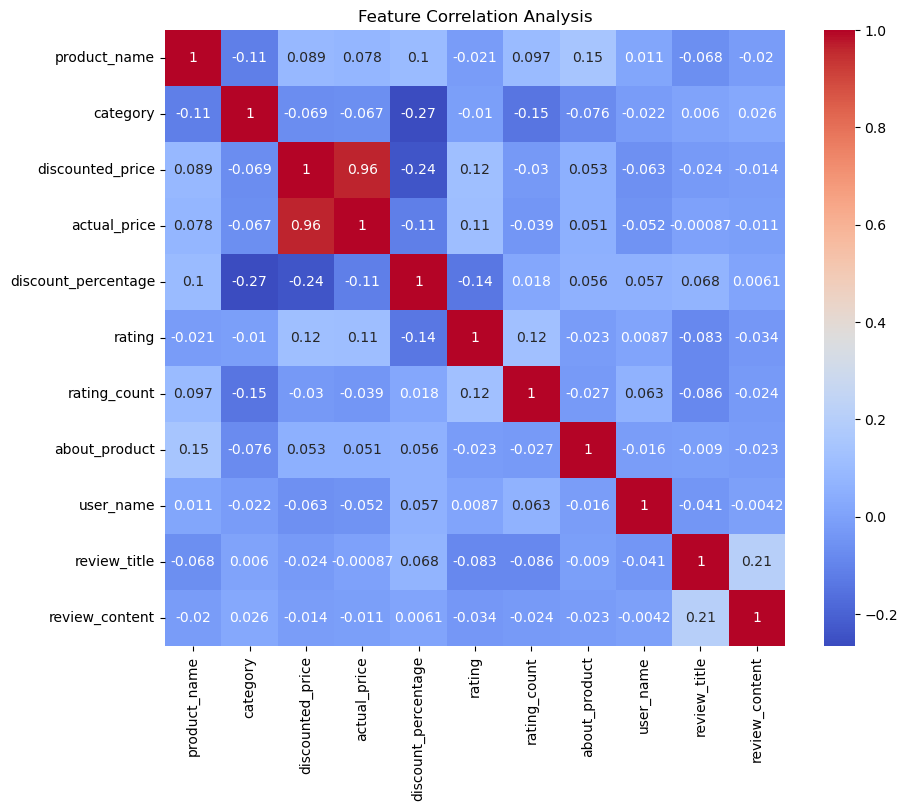

In [117]:
correlation_matrix = df2.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Analysis')
plt.show()


Heatmap ini menunjukkan hubungan (korelasi) antara fitur-fitur dalam dataset.
Warna merah terang (+1) berarti korelasi positif kuat (contoh: discounted_price dan actual_price korelasi 0.96).
Warna biru tua (-1) berarti korelasi negatif kuat.
Warna mendekati putih atau netral (0) berarti tidak ada hubungan linier yang signifikan.
Ini berguna untuk memahami hubungan antar fitur, menghindari redundansi, dan memilih fitur relevan untuk analisis lebih lanjut.

## Model Implementation

# Classification

## Decision Tree

Tujuan menggunakan model Decision Tree dapat memprediksi popularitas produk dengan mengklasifikasikan produk sebagai populer (1) atau tidak populer (0) berdasarkan fitur-fitur seperti rating, rating_count dan category. Kemudian kami juga menggunakan gini,entropy dan naive bayes, untuk melihat tingkat akurasinya yang mana lebih baik, dengan melihat akurasi tertinggi dianggap lebih baik dalam memprediksi popularitas produk. selain itu juga kami dapat mengevaluasi model menggunakan precision, recall, atau F1-score jika dataset tidak seimbang.

In [118]:
# Menambahkan kolom 'popular' sebagai label
df2['popular'] = ((df2['rating'] >= 4.0) & (df2['rating_count'] >= 100)).astype(int)

In [119]:
# Memilih fitur dan label
X = df2[['rating', 'rating_count', 'discount_percentage']]
y = df2['popular']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [121]:
X_train.shape, X_test.shape

((1113, 3), (279, 3))

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [123]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [124]:
# b. Predict the test set results
y_pred_en = clf_en.predict(X_test)

In [125]:
# c. Check Accuracy Score
print("Model accuracy score with criterion entropy:{:0.4f}".format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy:1.0000


In [126]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.4, 0.8333333333333334, 'x[0] <= 3.5\nentropy = 0.853\nsamples = 1113\nvalue = [310, 803]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 279\nvalue = [279, 0]'),
 Text(0.6, 0.5, 'x[1] <= 104.5\nentropy = 0.229\nsamples = 834\nvalue = [31, 803]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 803\nvalue = [0, 803]')]

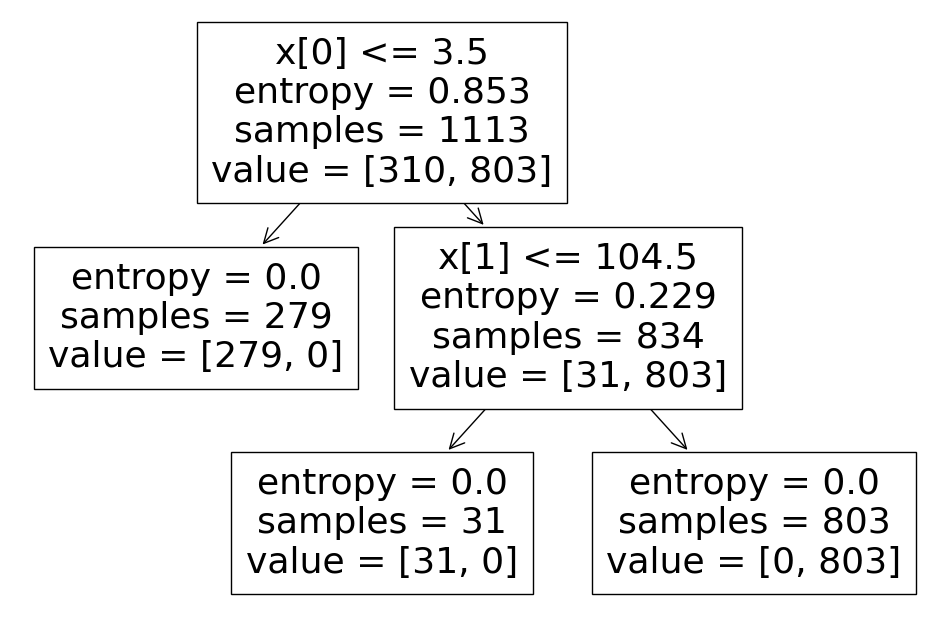

In [127]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

In [128]:
# a. Define Model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [129]:
# b. Predict the test set results
y_pred_gini = clf_gini.predict(X_test)

In [130]:
# c. Check Accuracy Score
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 1.0000


In [131]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.4, 0.8333333333333334, 'x[0] <= 3.5\ngini = 0.402\nsamples = 1113\nvalue = [310, 803]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 279\nvalue = [279, 0]'),
 Text(0.6, 0.5, 'x[1] <= 104.5\ngini = 0.072\nsamples = 834\nvalue = [31, 803]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 803\nvalue = [0, 803]')]

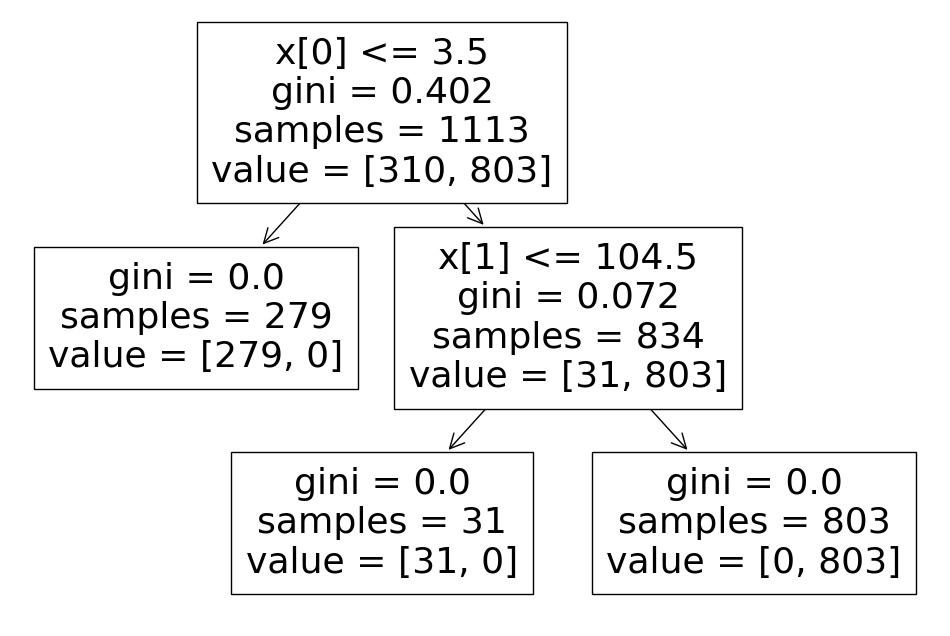

In [132]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

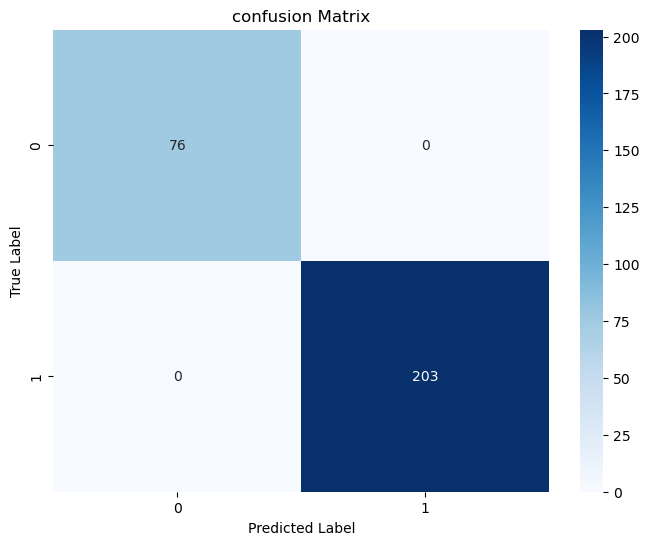

In [133]:
# f. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

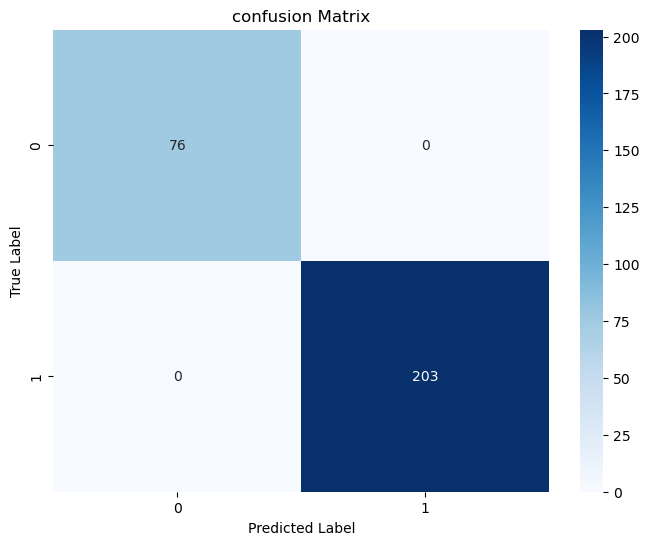

In [134]:
# f. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
# a.
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [137]:
# b.
nb_y_pred = nb_classifer.predict(X_test)

In [138]:
# c. 
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.7706


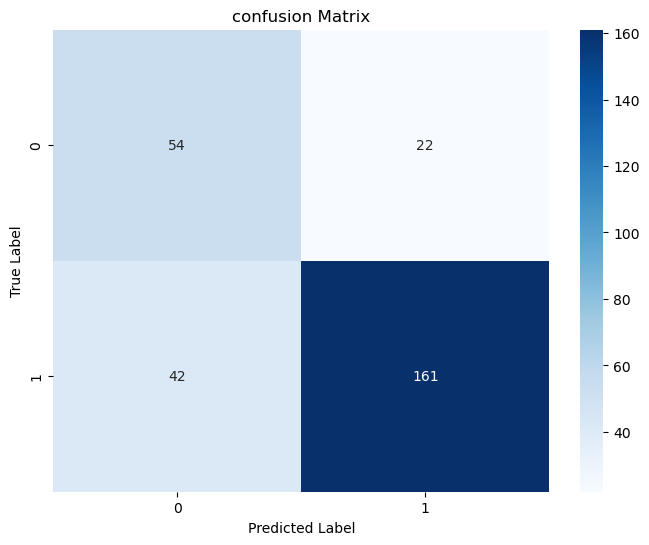

In [139]:
# d.
cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [140]:
# g. Classification Report Entropy
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00       203

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [141]:
# g. Classification Report Gini
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00       203

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [142]:
# e. Classification Report GNB
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63        76
           1       0.88      0.79      0.83       203

    accuracy                           0.77       279
   macro avg       0.72      0.75      0.73       279
weighted avg       0.79      0.77      0.78       279



## Kesimpulan Clasification

Seperti yang sudah saya sebutkan di atas, dengan melihat akurasi tertinggi dianggap lebih baik dalam memprediksi popularitas produk. jadi model clasification menggunakan gini,entropy dan Naive Bayes, yang lebih baik entropy atau gini karena nilai akuras keduanya sama yaitu 1.000 sedangkan naive bayes 0.9462. Artinya, mau kita gunakan gini ataupun entropy untuk memprediksi produk populer maupun tidak populer.

## Clustering

# K-Means

Untuk mengelompokkan pelanggan berdasarkan pola perilaku mereka (misalnya, pelanggan yang hanya membeli produk elektronik atau pelanggan yang sering memberikan rating tinggi).
tujuan Clustering digunakan untuk segmentasi pelanggan berdasarkan kepuasan, aktivitas ulasan dan preferensi kategori dengan memilih fitur relevan seperti rating, rating_count dan category, guna memahami perilaku dan menyusun strategi bisnis yang efektif.

In [143]:
df_clustering = df2[['rating', 'rating_count', 'category']].dropna()

In [144]:
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(df_clustering[['rating', 'rating_count', 'category']])

In [145]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

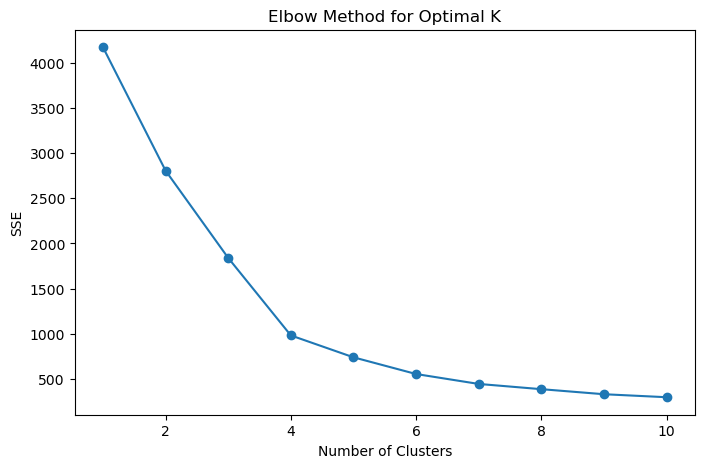

In [146]:
# manually visualize the elbow method using plotlib
# Visualisasi Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

In [147]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 4


In [148]:
# Melatih model K-Means dengan k=3
kmeans = KMeans(n_clusters=4, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(X)

# Melihat hasil clustering
print(df_clustering['cluster'].value_counts())

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    509
3    502
1    347
2     34
Name: cluster, dtype: int64


In [149]:
# Analisis rata-rata setiap fitur dalam setiap cluster
cluster_analysis = df_clustering.groupby('cluster').mean()
print(cluster_analysis)

           rating   rating_count   category
cluster                                    
0        4.005894   17341.950884   8.406680
1        2.982709    8735.556196  21.112392
2        3.970588  244138.529412  10.294118
3        4.000000   11180.159363  34.663347


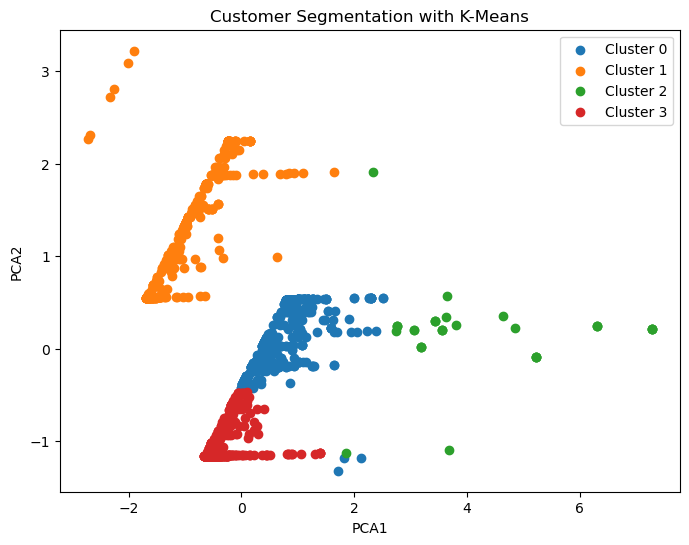

In [150]:
from sklearn.decomposition import PCA
# PCA (Principal Component Analysis) adalah teknik untuk mereduksi dimensi data dengan mengubah data yang memiliki banyak fitur menjadi lebih sedikit fitur (biasanya 2 atau 3) yang mempertahankan informasi utama. Ini memudahkan visualisasi dan analisis data yang kompleks. Dalam kode Anda, PCA digunakan untuk mengubah data dengan banyak fitur (misalnya rating, jumlah rating, kategori) menjadi dua dimensi (PCA1 dan PCA2) untuk memvisualisasikan hasil clustering.

# Mereduksi dimensi menjadi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi clustering
plt.figure(figsize=(8, 6))
for cluster in df_clustering['cluster'].unique():
    plt.scatter(X_pca[df_clustering['cluster'] == cluster, 0],
                X_pca[df_clustering['cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Customer Segmentation with K-Means')
plt.show()

Analisis cluster yang dihasilkan untuk memahami pola perilaku pelanggan:

Cluster 0: Pelanggan dalam cluster ini mungkin memberikan rating rata-rata atau tidak terlalu ekstrem (terlalu tinggi atau rendah).
Cluster 1: Pelanggan dengan rating tinggi dan banyak memberi ulasan.
Cluster 2: Pelanggan dengan rating rendah atau hanya membeli produk di kategori tertentu.
Cluster 3: Pelanggan yang sangat aktif memberikan rating, tetapi mungkin dengan produk dari kategori lebih luas.

##  Insights, Interpretations and Conclusions

Calasification 

Model Entropy & Gini:
Kedua model menghasilkan akurasi yang sama, yaitu 100%, yang berarti performa model ini sangat baik dalam memprediksi popularitas produk.
Model Naive Bayes:
Akurasinya sebesar 94.62%, lebih rendah dibandingkan Entropy & gini, namun tetap cukup baik.
Ini menunjukkan bahwa Naive Bayes cocok untuk data dengan pola sederhana tetapi mungkin kurang optimal untuk data dengan hubungan yang lebih kompleks.
Rekomendasi: Menggunakan Entropy atau Gini lebih disarankan untuk prediksi popularitas produk, karena keduanya memberikan akurasi tertinggi.

Clustering

Kesimpulannya clustering menggunakan K-Means menunjukan dataset pelanggan dapat dibagi menjadi 4 cluster yaitu. 0,1,2,3. Yang berarti keseluruhan, hasil clustering ini memberikan wawasan yang berharga untuk memahami segmen-segmen pelanggan dan memungkinkan bisnis untuk mengambil keputusan yang lebih tepat dalam strategi pemasaran dan pengembangan produk.